## Deliverables

- A Jupyter notebook containing all the code used.
- A short report (2-3 pages) summarizing the findings and insights from the exercises, including figures and tables as necessary. (This can but does not have to be done in LaTeX! It could be done in Markdown format inside the Jupyter Notebook)
- Submit work to the hand-in folder via the Moodle course - it is a group report but please hand in individually with all group member names and group name easy to find.

## Task 1: Data Exploration and Cleaning

**Objective:** Understand the dataset's structure, clean the data, and handle missing
values.

### 1.1 Find and Download a Dataset

Use Kaggle to find a dataset of interest. It should have both numerical and categorical data and some missing values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('taxis')

### 1.2 Data Exploration

- Load the dataset using pandas.
- Use .describe(), .info(), and .head() to explore the dataset's structure, summary statistics, and first few rows. Use comments or markdown cells to explain the data


By using the methods (`.head()`, `.info()`, `.describe()`) and command (`shape`), we get a geenal initial view and understanding of your data set. 

In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df.sample(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3135,2019-03-29 10:12:47,2019-03-29 10:46:28,1,3.53,22.0,1.00,0.0,26.30,yellow,credit card,Yorkville East,Times Sq/Theatre District,Manhattan,Manhattan
126,2019-03-13 08:46:04,2019-03-13 08:58:57,1,1.53,10.0,2.66,0.0,15.96,yellow,credit card,Lincoln Square West,Upper West Side North,Manhattan,Manhattan
4471,2019-03-11 10:10:47,2019-03-11 10:23:47,1,1.92,10.0,2.66,0.0,15.96,yellow,credit card,Murray Hill,West Village,Manhattan,Manhattan
3784,2019-03-02 00:50:05,2019-03-02 00:58:26,6,1.80,8.5,0.00,0.0,12.30,yellow,credit card,Flatiron,Alphabet City,Manhattan,Manhattan
2142,2019-03-27 14:33:39,2019-03-27 14:54:00,1,0.82,12.5,3.95,0.0,19.75,yellow,credit card,Midtown Center,Times Sq/Theatre District,Manhattan,Manhattan


The method `.head()` gives us a quick view, at our data first five rows. In addition, we also use the `sample()` method to get a more spread out and random views of our data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

By using the `.info()` method we have observed that our datasets 14 columns have different datatypes such as: `datatime`, `int`, `float` and `object`. In addition we observed that there are missing values in columns:
- `Payment` (44)
- `pickup_zone` (26)
- `dropoff_zone` (45)   
- `pickup_borough` (26)
- `dropoff_borough` (45)

In [6]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


The method .describe() gives us som simple, but specifically individual statistics about our columns, here we have observed: 
- Datetime columns (`pickup` and  `dropoff`): When we look at min and max we can see that our data range spans from February 28th 2019 to April 1st 2019. 

- `passengers`: The minimum value is 0, which most likely is do to error or cancellation. The max is 6 passengers and the median (50%) is 1, which indicates that most trips by taxi are single person trips.

- `distance`: When looking at the travel distance, we can see that the median distance is only 1.64 miles, which suggests that many trips are at short distances; however long distance trips do exist, at a maximun of 36.7 miles.

- `fare and total cost`: The min fare is $1.00, which more then likely is the base fare. The max fare is $150 and the total cost is $174.82, which suggest outliers or just a long trips.

- `tips`: The median tips is $1.70; however the 25th percentile is $0, which indicates that many taxi trips don't receive tips. The maximum trip is $33.20 which is an unique but generous trip outlier.

- `tolls`: We can see that the 75th percentile is $0, which indicates that most taxi drivers try to avoid toll roads; however the maximum toll is $24.02, which indicates that a few trips went through very expensive roads that has tolls.

In [7]:
df.shape

(6433, 14)

We use shape command for easy way get the number of rows and columns in our dataset, which is `6433 rows` and `14 columns`.

### 1.3 Data Cleaning

- Identify columns with missing values.
- For numerical columns, interpolate missing values.
- For categorical columns, replace missing values with the mode or another standard technique (such as the mean of the two adjacent data points)
- Drop columns with more than 50% missing values.
- Drop extreme outliers and explain why they were considered outliers

In [8]:
null_count = df.isnull().sum()

for col, i in null_count.items():
    if i > 0:
        print(f'{col}: {i} ({i / df.shape[0] * 100:.2f}%)')

print(f'Total missing values: {df.isnull().sum().sum()} (This is missing values for individual cells, which means that a single row can have multiple missing values.)')

missing_strs = df.applymap(lambda x: x == "")
missing_str_group = df[missing_strs].count()
missing_str_total = missing_str_group.sum()
print(f'\nEmpty strings found {missing_str_total} ({missing_str_total / df.shape[0] * 100:.2f}%)')

payment: 44 (0.68%)
pickup_zone: 26 (0.40%)
dropoff_zone: 45 (0.70%)
pickup_borough: 26 (0.40%)
dropoff_borough: 45 (0.70%)
Total missing values: 186 (This is missing values for individual cells, which means that a single row can have multiple missing values.)

Empty strings found 0 (0.00%)


When look at errors in the dataset, we have observed that there are a total of 186 missing values in 92 rows, which means there are rows with multiple missing values. Furthermore, the percentage of missing values for individual columns are no more then 0.7% and as low as 0.4%:

- `payment`: 44 missing values (0.68%)
- `pickup_zone`: 26 missing values (0.40%)
- `dropoff_zone`: 45 missing values (0.70%)
- `pickup_borough`: 26 missing values (0.40%)
- `dropoff_borough`: 45 missing values (0.70%)

Also as a side note, there are no empty strings in the dataset.

In [9]:
# Converting color and payment to category
# df['color'] = df['color'].astype('category')
# df['payment'] = df['payment'].astype('category')


# Converting object columns to strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   category      
 9   payment          6389 non-null   category      
 10  pickup_zone      6407 non-null   category      
 11  dropoff_zone     6388 non-null   category      
 12  pickup_borough   6407 non-null   category      
 13  dropoff_borough  6388 non-null   category      
dtypes: category(6), datetime64[ns](2), float

For the following columns: `pickup_zone`, `dropoff_zone`, `pickup_borough`, `dropoff_borough`, `color` and `payment` we have change there data type from `object` to `category` type.

In [10]:
df[df.isnull().any(axis=1)] # Displaying rows with missing values in any column

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,NaN,Brooklyn,NaN
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,NaN,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,NaN,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,NaN,Queens,NaN


We have identified that there is a total of 92 rows with missing values.

In [11]:
# Calulated how many times passengers is 0
passenger_zero = df[df['passengers'] == 0].shape[0]
print(f'Passenger count is zero: {passenger_zero} ({passenger_zero / df.shape[0] * 100:.2f}%)')

# Calulated how many times distance is 0
distance_zero = df[df['distance'] == 0].shape[0]
print(f'Distance is zero: {distance_zero} ({distance_zero / df.shape[0] * 100:.2f}%)')

# Calulated how many times fare is 1
fare_one = df[df['fare'] == 1].shape[0]
print(f'Fare is one: {fare_one} ({fare_one / df.shape[0] * 100:.2f}%)')


# Calcalated many pay more than $n:
print()
for i in np.arange(df['total'].mean(), df['total'].max(), 10):
    total_over = df[df['total'] > i].shape[0]
    print(f'total is over ${i:.2f}: count: {total_over} ({total_over / df.shape[0] * 100:.2f}%)')


Passenger count is zero: 96 (1.49%)
Distance is zero: 51 (0.79%)
Fare is one: 1 (0.02%)

total is over $18.52: count: 1935 (30.08%)
total is over $28.52: count: 837 (13.01%)
total is over $38.52: count: 487 (7.57%)
total is over $48.52: count: 318 (4.94%)
total is over $58.52: count: 195 (3.03%)
total is over $68.52: count: 108 (1.68%)
total is over $78.52: count: 36 (0.56%)
total is over $88.52: count: 14 (0.22%)
total is over $98.52: count: 11 (0.17%)
total is over $108.52: count: 8 (0.12%)
total is over $118.52: count: 7 (0.11%)
total is over $128.52: count: 5 (0.08%)
total is over $138.52: count: 4 (0.06%)
total is over $148.52: count: 3 (0.05%)
total is over $158.52: count: 3 (0.05%)
total is over $168.52: count: 2 (0.03%)


Outliers and potential errors in the dataset are in the following columns:
- `passengers`: There are 96 (1.49%) rows with 0 passengers.
- `distance`: There are 51 (0.79%) rows with 0 distance.
- `fare`: There is 1 (0.02%) row with a fare of $1.00.
- `total`: 
    - total is over $18.52: count: 1935 (30.08%)
    - total is over $28.52: count: 837 (13.01%)
    - total is over $38.52: count: 487 (7.57%)
    - total is over $48.52: count: 318 (4.94%)
    - total is over $58.52: count: 195 (3.03%)
    - total is over $68.52: count: 108 (1.68%)
    - total is over $78.52: count: 36 (0.56%)
    - total is over $88.52: count: 14 (0.22%)
    - total is over $98.52: count: 11 (0.17%)
    - total is over $108.52: count: 8 (0.12%)
    - total is over $118.52: count: 7 (0.11%)
    - total is over $128.52: count: 5 (0.08%)
    - total is over $138.52: count: 4 (0.06%)
    - total is over $148.52: count: 3 (0.05%)
    - total is over $158.52: count: 3 (0.05%)
    - total is over $168.52: count: 2 (0.03%)

The total has some outliers in the range of ish $78 to $168.52, which we have decided to keep, as they are not errors, but just high cost trips. However, it's important to be aware that these might cause issues when training a model.


In [12]:
df = df.dropna() # Drop rows with missing values

# Drop rows where passengers, distance is less than 0 and fare is less than 1:
df = df[df['passengers'] > 0] 
df = df[df['distance'] > 0] 
df = df[df['fare'] > 1] 

Due to the low amount of missing values in the dataset, have we decided to just drop the rows that has missing values (Nah values), beacuse we consider that this would not have a significant impact on the dataset, since it's only 92 rows out of 6433 rows.

The rows with 0 passengers, 0 distance and $1.00 fare are most likely errors, because not having passengers or distance would mean that the taxi never picked up the passenger or go anywhere, and a fare of $1.00 only happens once, which more then likly is a error or rear outlier. We have decided to drop these rows, as they are most likely errors.

In [13]:
print("data shape: ", df.shape)
df.sample(5)

data shape:  (6219, 14)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5404,2019-03-20 21:03:10,2019-03-20 21:11:12,1,1.79,8.5,0.00,0.0,12.30,yellow,cash,Midtown Center,Upper East Side North,Manhattan,Manhattan
638,2019-03-07 14:27:58,2019-03-07 14:45:49,1,2.25,13.0,0.00,0.0,13.80,yellow,cash,Sunnyside,Elmhurst,Queens,Queens
3171,2019-03-20 07:31:39,2019-03-20 07:44:06,2,2.05,10.0,2.66,0.0,15.96,yellow,credit card,Lincoln Square East,Midtown East,Manhattan,Manhattan
2557,2019-03-01 19:20:24,2019-03-01 19:31:35,1,1.50,9.0,2.66,0.0,15.96,yellow,credit card,West Village,East Village,Manhattan,Manhattan
3738,2019-03-01 12:18:43,2019-03-01 12:26:32,1,0.81,6.5,2.45,0.0,12.25,yellow,credit card,Midtown North,Lincoln Square East,Manhattan,Manhattan


Verifying the data after values have been dropped.

In [14]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6219,6219,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000
mean,2019-03-16 08:21:03.659430656,2019-03-16 08:35:27.545585920,1.567937,3.014321,12.888514,1.967133,0.310339,18.306041
min,2019-02-28 23:29:03,2019-02-28 23:32:35,1.000000,0.010000,2.500000,0.000000,0.000000,3.300000
25%,2019-03-08 15:01:20.500000,2019-03-08 15:42:37,1.000000,1.000000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:48:46,2019-03-15 22:07:18,1.000000,1.660000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:15:15.500000,2019-03-23 17:29:35,2.000000,3.225000,15.000000,2.790000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.203354,3.725667,10.661000,2.348221,1.360578,12.856469


When looking at this `describe` method again after the removal of missing values and som erros/outliers we can see that not much has changed on a high level; however here are the most significant changes:

- `passengers`: Due to the remvel of 0 passengers, the min value is now 1, which is more realistic. The max is still 6 passengers and the median (50%) is 1, which indicates that most trips by taxi are single person trips.

- `distance`: Due to the removal of 0 distance, the median distance is now 1.66 miles, which bacially is the same as before (1.64 miles).

- `fare and total cost`: The min fare is now $12.88, which is significantly higher then the previous min fare of $1.00, however this is more realistic then one occurrence of $1.00. 

### 1.4 Data Visualization

- Use matplotlib or seaborn to visualize the distribution of variables both quantitative and categorical (parametric and non-parametric)

array([[<Axes: title={'center': 'passengers'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'tolls'}>,
        <Axes: title={'center': 'total'}>]], dtype=object)

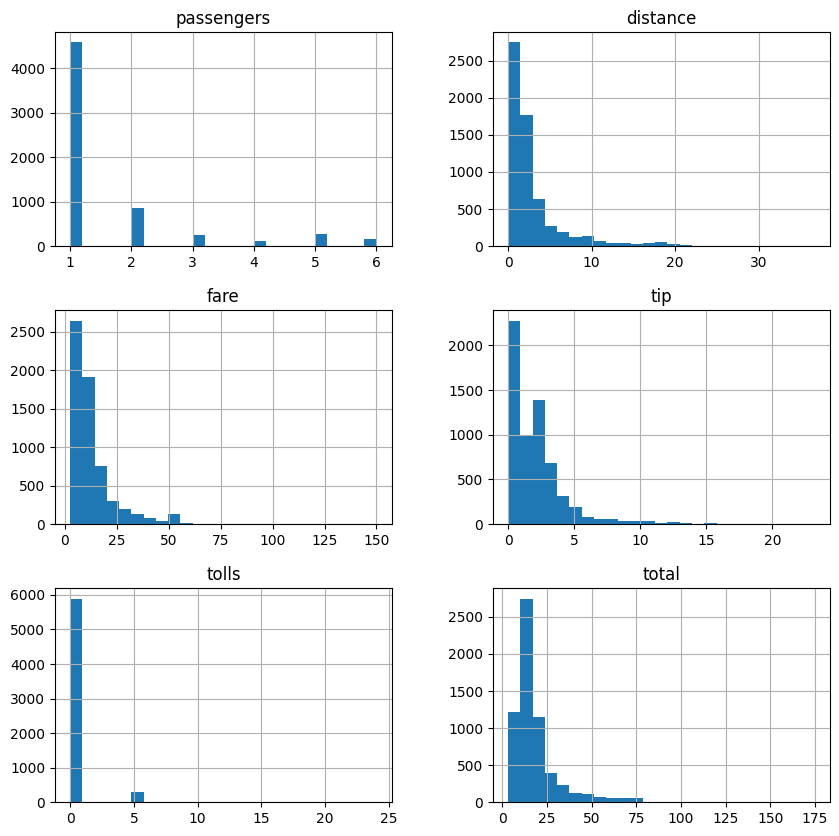

In [15]:
# Checking for all numeric columns distribution:
n_cols = df.select_dtypes(include=['number']).columns
df_nums = df[n_cols]
df_nums.hist(figsize=(10, 10), bins=25)

In the visualization of the distribution of all numeric columns, we can tell that the data is skewed to the right, which is expected for taxi data, as most trips are short distance trips. 

nb: its the columns `total`, `fare`, `tip`, and `distance` that are skewed to the right, while `tolls` and `passengers` basically just one value.

<Figure size 1200x500 with 0 Axes>

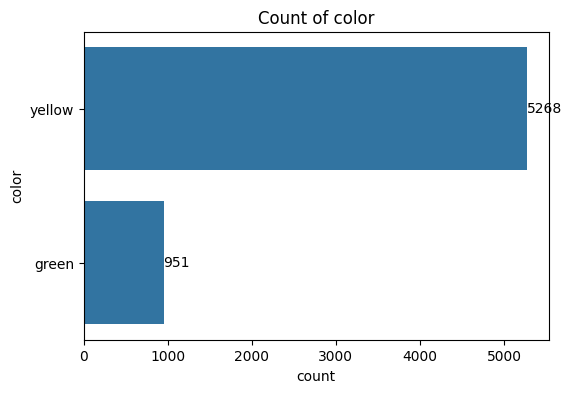

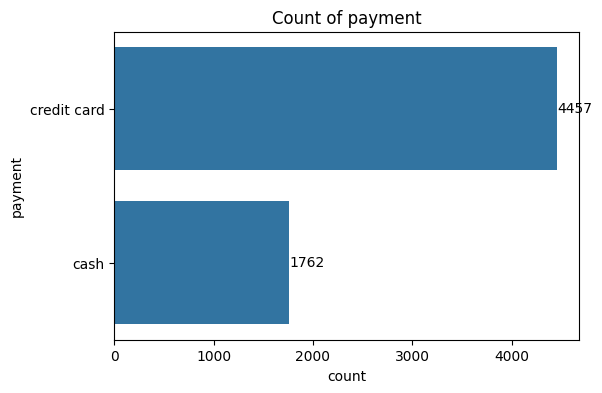

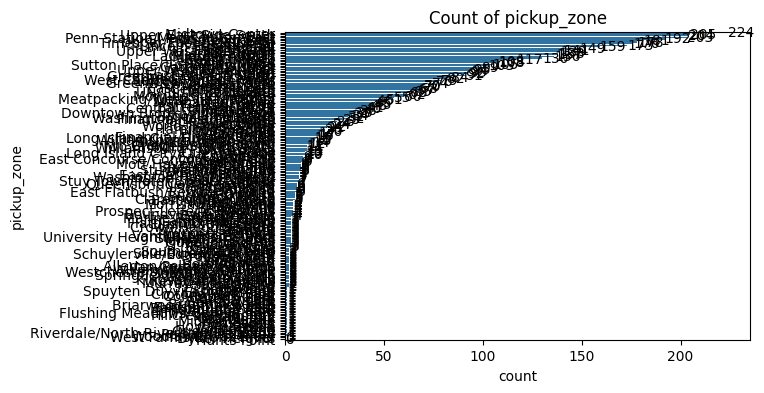

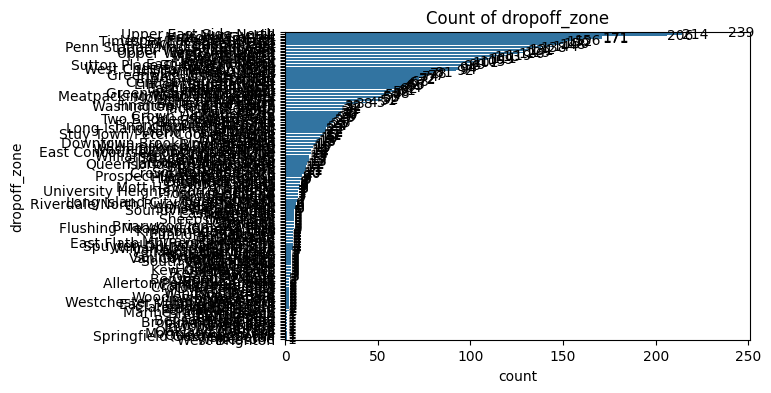

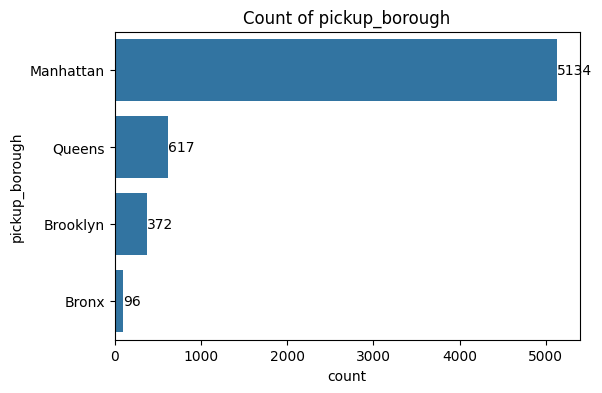

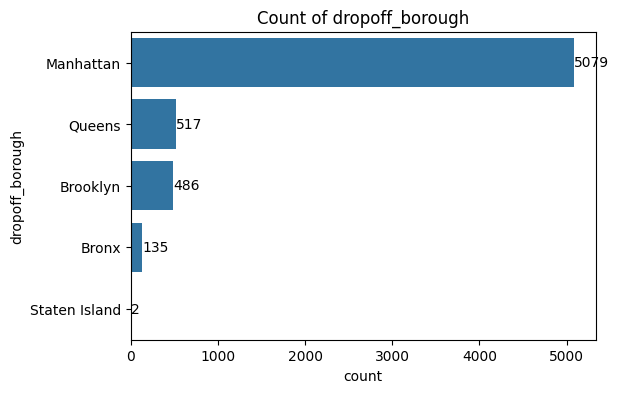

In [16]:
cat_cols = df.select_dtypes(include=["category"]).columns

plt.figure(figsize=(12, 5))
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    plt.title(f'Count of {col}')
    sns.countplot(y=df[col], order = df[col].value_counts().index)

    for i, v in enumerate(df[col].value_counts()):
        plt.text(v, i, v, ha='left', va='center')

    plt.show()


When visualizing the categorical data, we learn that, most dropoffs and pickups are in Manhatten, the most preferred payment method is card, and the most common taxi color is yellow which indicates most taxis are yellow in new york.

## Task 2: Feature Engineering and Descriptive Statistics

**Objective:** Enhance the dataset with new features and then use descriptive statistics
to explain the distribution of the data.

### 2.1 Feature Engineering

- Create a new feature by binning a numerical variable into categories (e.g., low, medium, high). Put ranges (eg age, into three or four groups rather than a continuous distribution)
- Implement one-hot encoding for a categorical variable.


#### New Features

In [17]:
# Feature trip duration
df['trip_duration'] = np.subtract(df['dropoff'] , df['pickup']).dt.total_seconds()
df['trip_duration'].describe()

count    6219.000000
mean      863.886155
std       689.019223
min         4.000000
25%       396.500000
50%       657.000000
75%      1110.500000
max      6460.000000
Name: trip_duration, dtype: float64

The idea of the new feature: `trip_duration` is to get a better insight into the length of each trip, which is useful for trip analyze and further feature engineering for categorizing trips into short, medium, and long trips.

In [18]:
bins = [-1, 400, 700, 1200, df['trip_duration'].max()]
labels = ['short', 'medium', 'long', 'extra long']
df['trip_duration_bin'] = pd.cut(df['trip_duration'], bins=bins, labels=labels)

The idea of the new feature: `trip_duration_bin` is categorizing the trip duration into categories of short, medium, and long trips. This is useful for further analysis and machine learning models, as it can be used as a categorical variable.

The bins are set to capture the lower quartile (ish 400), the median (ish 800), and the upper quartile (ish 1200) of the trip duration.

In [19]:
# Feature time of day
df['pickup_hour'] = df['pickup'].dt.hour
df['dropoff_hour'] = df['dropoff'].dt.hour

bins = [-1, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

df['pickup_time'] = pd.cut(df['pickup_hour'], bins=bins, labels=labels)
df['dropoff_time'] = pd.cut(df['dropoff_hour'], bins=bins, labels=labels)


The new features `pickup_hour`, `dropoff_hour`, `pickup_time` and `dropoff_time` is to captur the time of day patterns in the taxi data to hopefully reveal insights to the trip demand.

Beacuse pickup and dropoff hours are categorizing into specific time periods (night, morning, afternoon, and evening), we can analyze and model how the time of day influences different tings sush as trips or fare.

The time of day is categorized into four categories:
- Night: 00:00 - 06:00
- Morning: 06:00 - 12:00
- Afternoon: 12:00 - 18:00
- Evening: 18:00 - 24:00
nb: it say -1 in `bins = [-1, 6, 12, 18, 24]`, which just ensures that midnight (hour = 0) falls into the category of night.


#### One-hot Encoding

In [20]:
cols_to_encode = ['color']

df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
df.head()   

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration,trip_duration_bin,pickup_hour,dropoff_hour,pickup_time,dropoff_time,color_yellow
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,375.0,short,20,20,evening,evening,True
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,425.0,medium,16,16,afternoon,afternoon,True
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,credit card,Alphabet City,West Village,Manhattan,Manhattan,444.0,medium,17,18,afternoon,afternoon,True
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1552.0,extra long,1,1,night,night,True
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,572.0,medium,13,13,afternoon,afternoon,True


### 2.2 Descriptive Statistics

- Calculate the mean, median, and standard deviation for numerical features.
- For categorical features, count the frequency of each category.

In [21]:
# Mean, median, and standard deviation for all numeric columns:
n_cols = df.select_dtypes(include=['number']).columns
df_nums = df[n_cols]

for col in df_nums.columns:
    print(f'Column: {col}:')
    print(f'mean: {df_nums[col].mean()}')
    print(f'median: {df_nums[col].median()}')
    print(f'std: {df_nums[col].std()}')
    print(" ")

Column: passengers:
mean: 1.567936967358096
median: 1.0
std: 1.2033542853504438
 
Column: distance:
mean: 3.0143206303264187
median: 1.66
std: 3.725666724029867
 
Column: fare:
mean: 12.888514230583697
median: 9.5
std: 10.661000474380723
 
Column: tip:
mean: 1.9671329795787107
median: 1.75
std: 2.3482206324093835
 
Column: tolls:
mean: 0.3103392828429008
median: 0.0
std: 1.360577717254151
 
Column: total:
mean: 18.306041164174307
median: 14.16
std: 12.856468632878151
 
Column: trip_duration:
mean: 863.886155330439
median: 657.0
std: 689.0192228448043
 
Column: pickup_hour:
mean: 13.90127030069143
median: 15.0
std: 6.059788154765875
 
Column: dropoff_hour:
mean: 13.939861714101946
median: 15.0
std: 6.136586077866923
 


- **Passengers**: On average, there are about 1.57 passengers per trip, with most trips having just 1 passenger.

- **Distance**: The average trip distance is around 3.01 units, but trips vary significantly.

- **Fare**: The mean fare is about $12.89, with a typical fare around $9.5, showing some variability.

- **Tip**: Tips average $1.97, with a median of $1.75, suggesting some higher values influencing the mean.

- **Tolls**: Most trips have no tolls (median = $0), but the mean ($0.30) suggests some trips do accumulate toll costs.

- **Total**: The total trip cost averages $18.31, with a median of $14.16, indicating a skew towards higher fares.

- **Trip Duration**: Trips last about 864 seconds (14.4 minutes) on average, but with large variations.

- **Pickup & Dropoff Hours**: Trips mostly occur around 2 PM, though times are spread throughout the day.

In [22]:
# For categorical features, count the frequency of each category:
df_cats = df.select_dtypes(include=['category'])

for col in df_cats.columns:
    print(df_cats[col].value_counts())
    print()

payment
credit card    4457
cash           1762
Name: count, dtype: int64

pickup_zone
Midtown Center                  224
Upper East Side South           205
Clinton East                    204
Penn Station/Madison Sq West    203
Midtown East                    192
                               ... 
Pelham Parkway                    1
Woodlawn/Wakefield                1
West Farms/Bronx River            1
Dyker Heights                     0
Hunts Point                       0
Name: count, Length: 194, dtype: int64

dropoff_zone
Upper East Side North        239
Murray Hill                  214
Midtown Center               206
Midtown East                 171
Upper East Side South        171
                            ... 
Queensboro Hill                1
Springfield Gardens South      1
Stapleton                      1
Whitestone                     1
West Brighton                  1
Name: count, Length: 203, dtype: int64

pickup_borough
Manhattan    5134
Queens        617
Brooklyn  

We can see that the majority pay with card, and that the majority of trips are at a medium distance; however there are all close in form of frequency:
- `medium`:        1730 s
- `short`:         1582 s
- `long`:        1566 s
- `extra long`:    1341 s

Also, the majority of trips are in the afternoon and then morning; however the difference is not that big from morning and evening.

### 2.3 Visualization

- Use seaborn to create box plots for numerical features to identify outliers.
- Visualize the distribution of categorical features using bar plots.

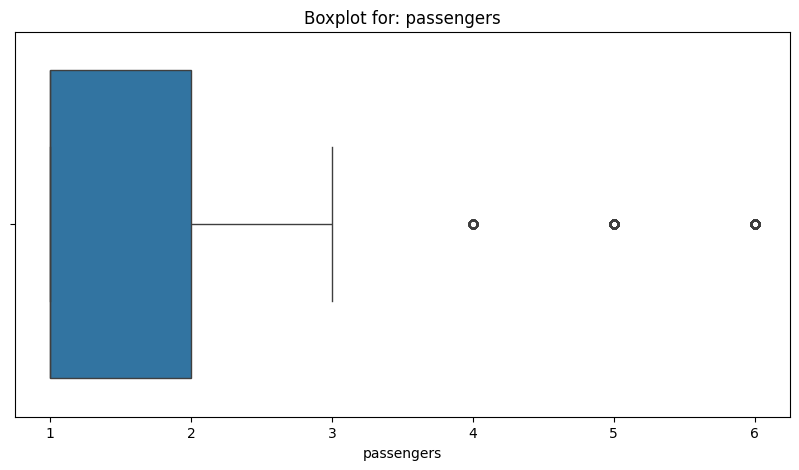

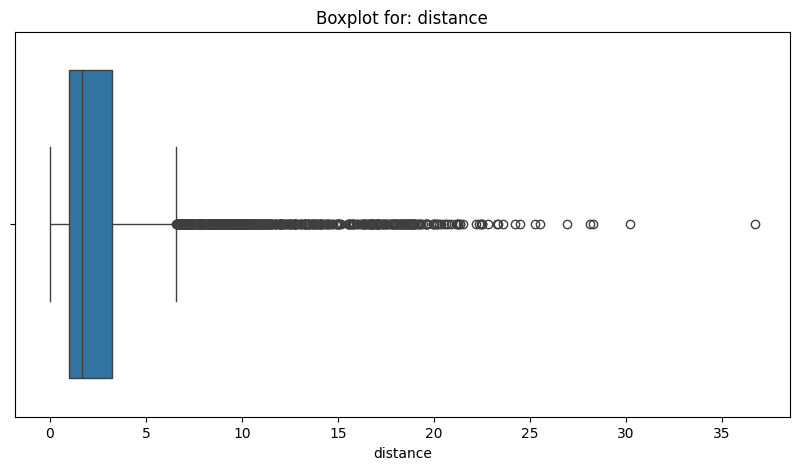

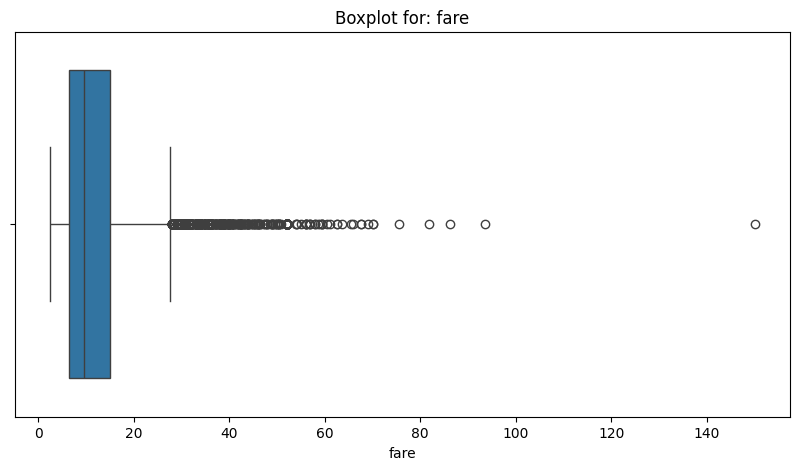

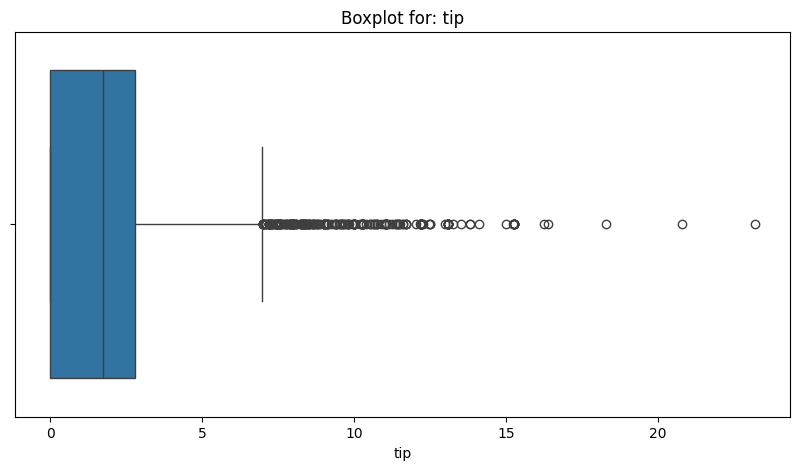

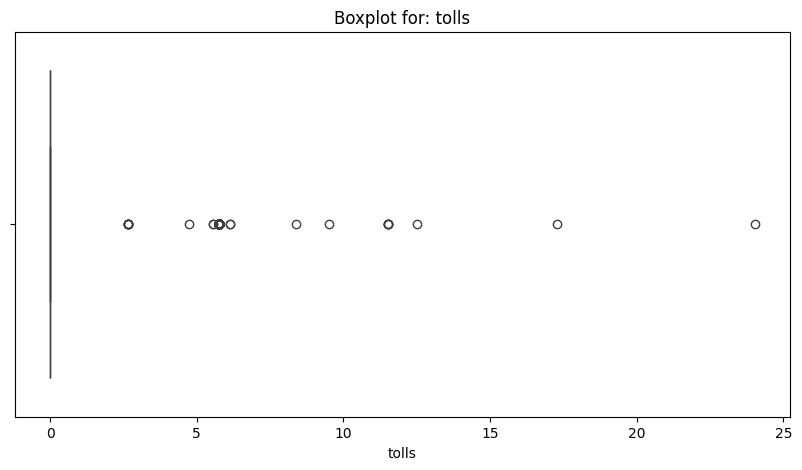

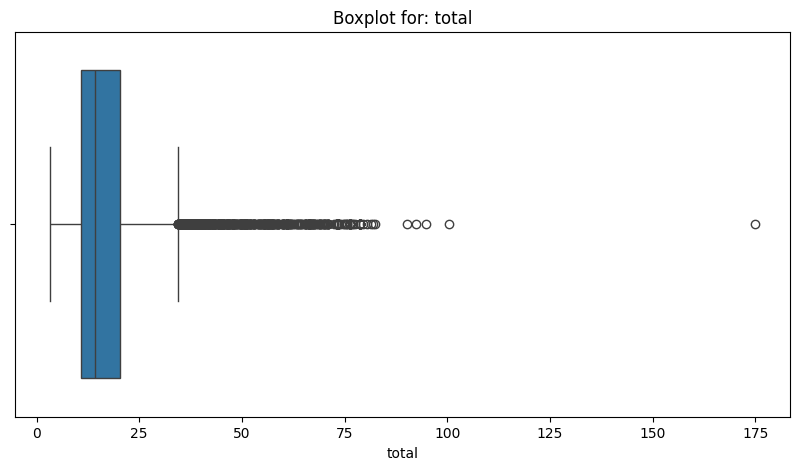

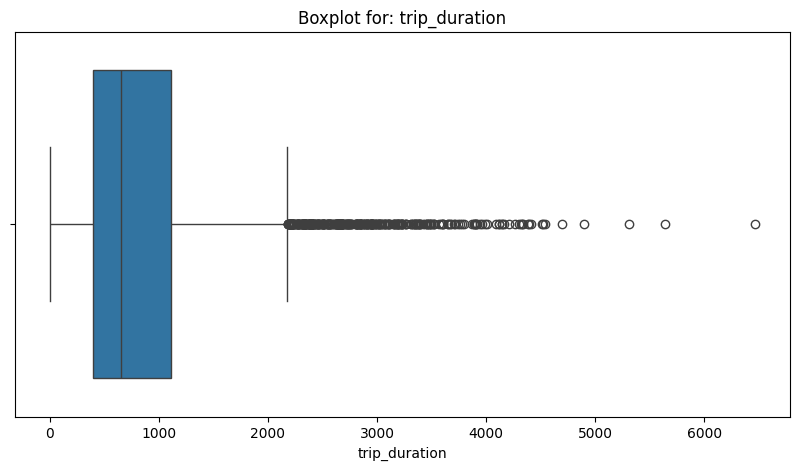

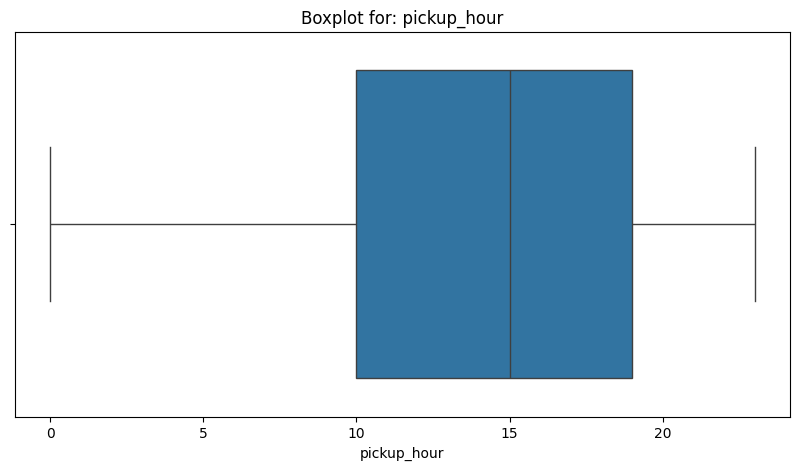

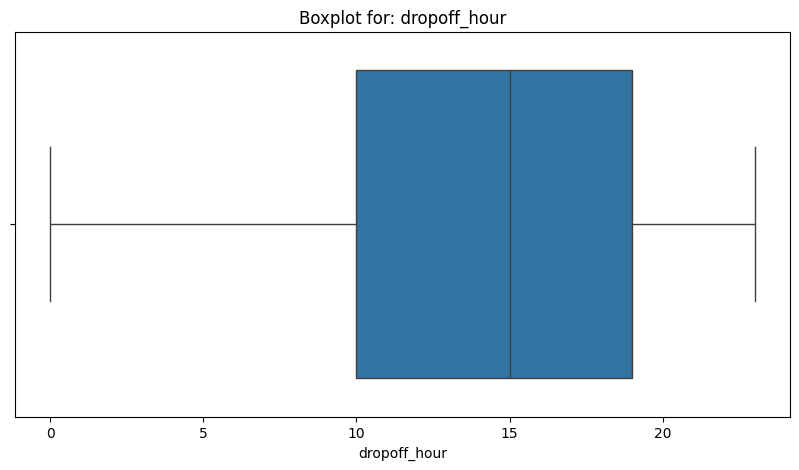

In [23]:
# Box plot for all numeric columns:
for col in df_nums.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for: {col}')
    plt.xlabel(col)
    plt.show()

By using box plots, we can see that there are a mix of outliers in size, which ranges from small to a few extreme outliers in the columns: `trip_duration`, `total`, `tolls`, `tip`, `fare`, `distance`.

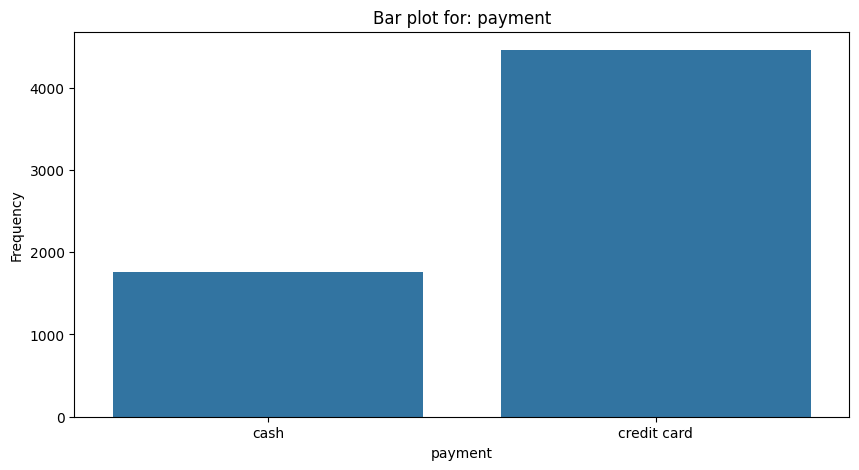

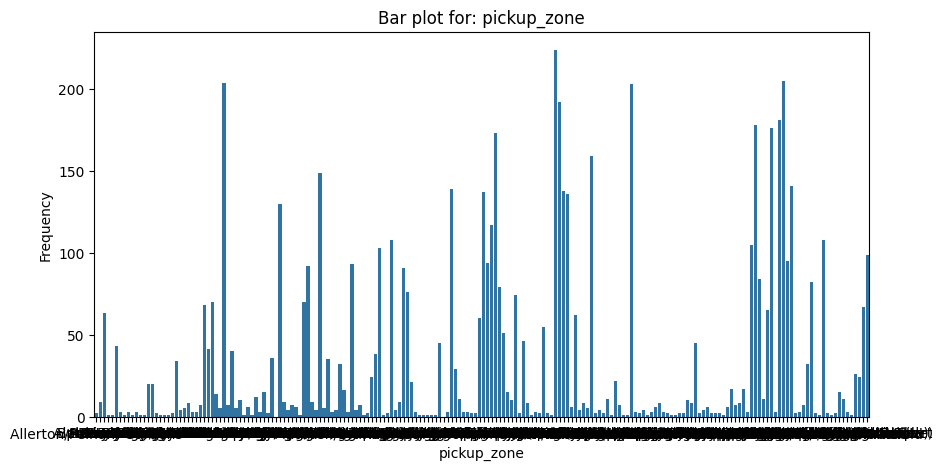

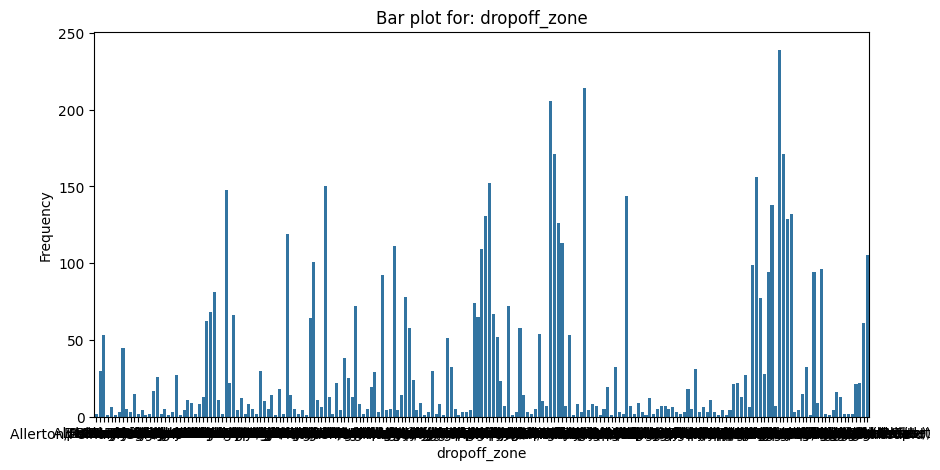

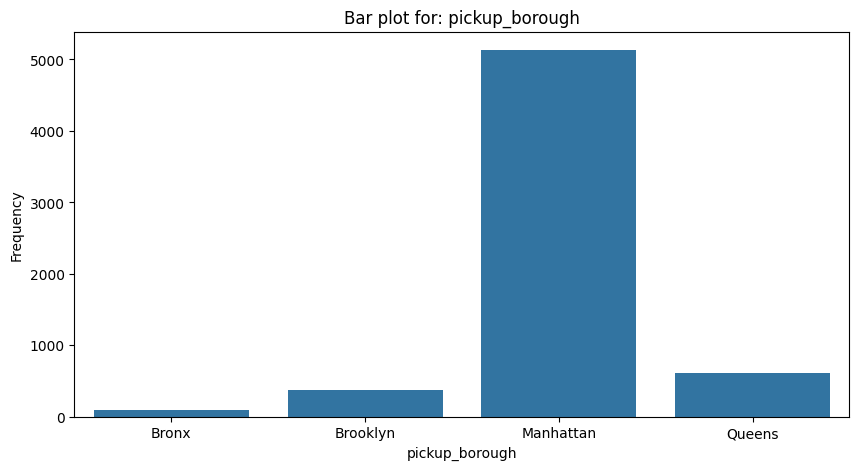

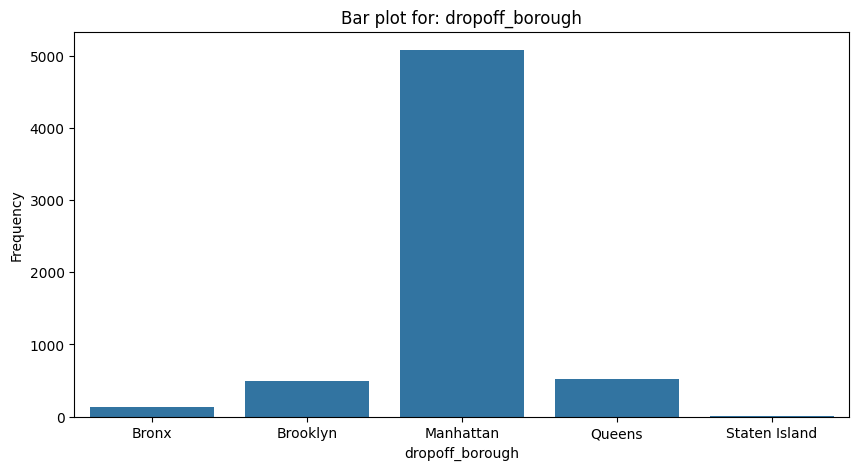

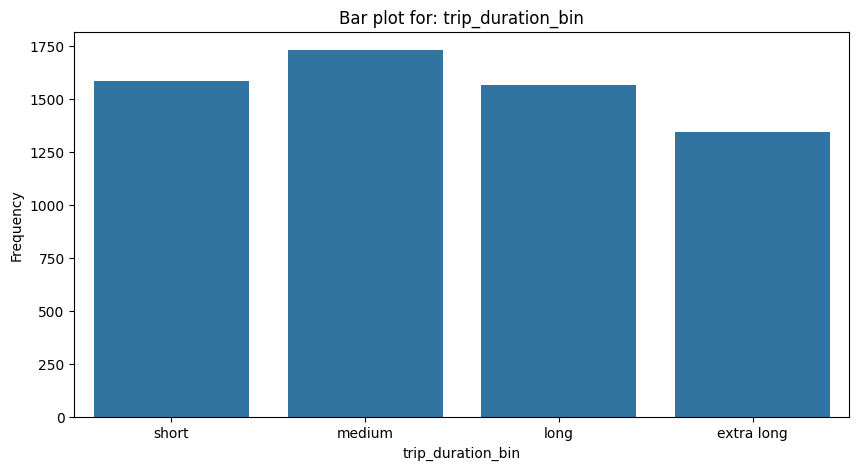

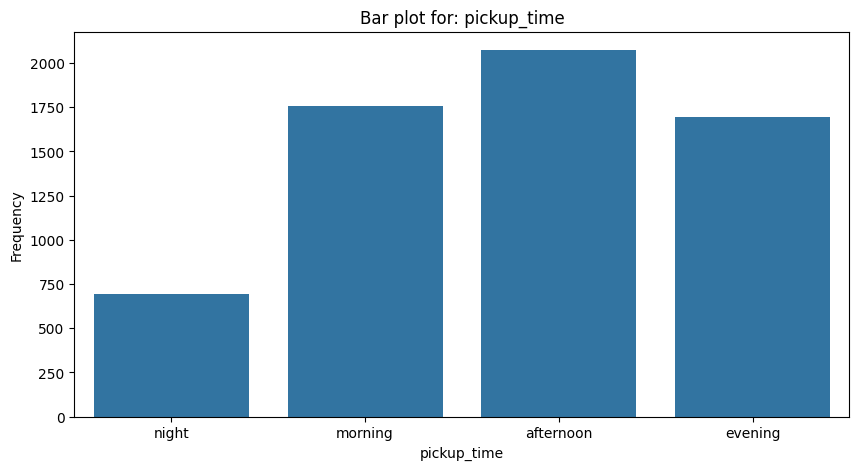

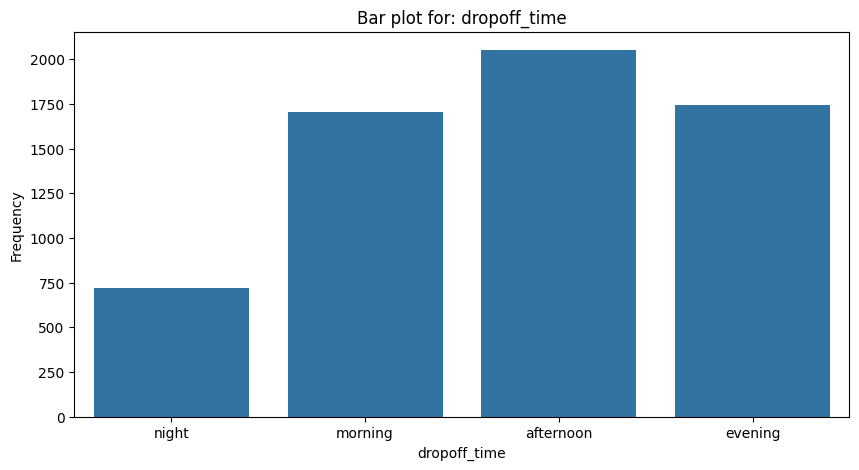

In [24]:
# Visualize the distribution of categorical features using bar plots.
for col in df_cats.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar plot for: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Most pickups and dropoffs happen in the afternoon, and normaly the most common length of trips are medium then short, long and extra long, but not with a big difference. Also, the most common payment method is card.

## Task 3: Data Wrangling and Analysis

**Objective:** Perform data wrangling to prepare data for analysis and conduct simple
analysis to extract stories about the data - what can we say about this data?.

### 3.1 Data Selection and Wrangling

- Select a subset of columns relevant to a hypothetical question of interest (e.g., predicting a target variable).
- Use .groupby() to aggregate data and calculate mean values for each category of a selected categorical variable.

**Hyphothetical question**: As a taxi driver, I want to know which pickup borough offers the highest profitability. How do fare, tip, and trip characteristics (like distance and duration) vary across different boroughs, and which one provides the best overall profit margins?

In [25]:
df['profit'] = df['fare'] + df['tip']
df_subset = df[['pickup_borough', 'fare', 'tip', 'distance', 'trip_duration', 'profit']].copy()
df_subset.head()

,pickup_borough,fare,tip,distance,trip_duration,profit
0,Manhattan,7.0,2.15,1.60,375.0,9.15
1,Manhattan,5.0,0.00,0.79,425.0,5.00
2,Manhattan,7.5,2.36,1.37,444.0,9.86
3,Manhattan,27.0,6.15,7.70,1552.0,33.15
4,Manhattan,9.0,1.10,2.16,572.0,10.10


In [26]:
borough_stats = df_subset.groupby('pickup_borough')[['fare', 'tip', 'profit', 'distance', 'trip_duration']].mean().reset_index()

print("Average Metrics by Pickup Borough:")
print(borough_stats)

Average Metrics by Pickup Borough:
  pickup_borough       fare       tip     profit  distance  trip_duration
0          Bronx  20.538646  0.153229  20.691875  5.794375    1456.041667
1       Brooklyn  16.522796  0.994892  17.517688  4.174919    1167.715054
2      Manhattan  11.080721  1.938216  13.018937  2.346907     767.878068
3         Queens  24.549530  3.076159  27.625689  7.435511    1387.442464


### 3.2 Data Analysis

- Use seaborn to create scatter plots to visualize relationships between pairs of numerical variables.(X an Y axis are used for the variables)
- Create a pairplot to visualize the pairwise relationships in the dataset.

See https://seaborn.pydata.org/generated/seaborn.pairplot.html

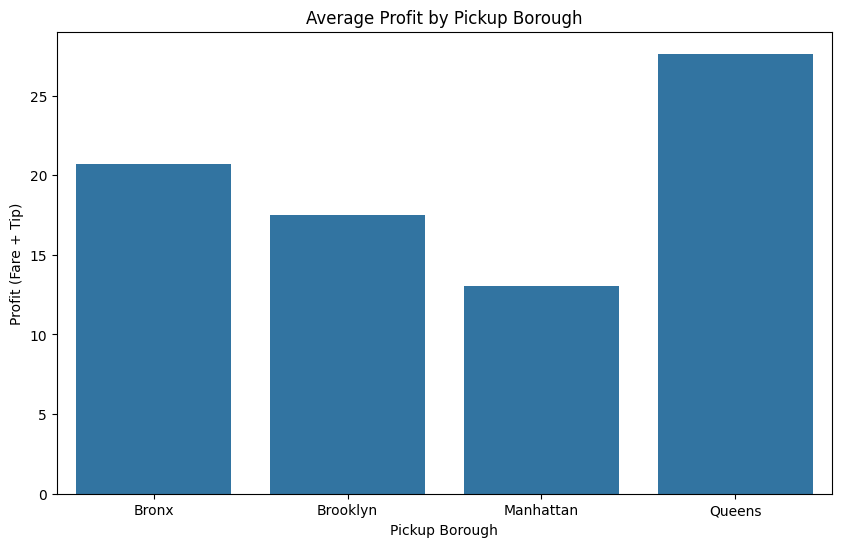

In [27]:
# Bar Plot of Average Profit by Pickup Borough
plt.figure(figsize=(10,6))
sns.barplot(data=borough_stats, x='pickup_borough', y='profit')
plt.title("Average Profit by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Profit (Fare + Tip)")
plt.show()

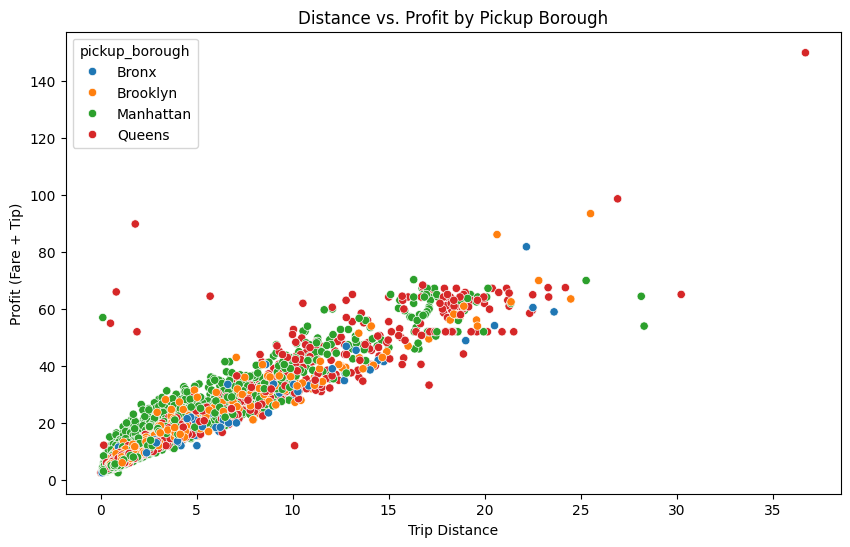

In [28]:
# Scatter Plot Distance vs Profit by Pickup Borough

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_subset, x='distance', y='profit', hue='pickup_borough')
plt.title("Distance vs. Profit by Pickup Borough")
plt.xlabel("Trip Distance")
plt.ylabel("Profit (Fare + Tip)")
plt.show()

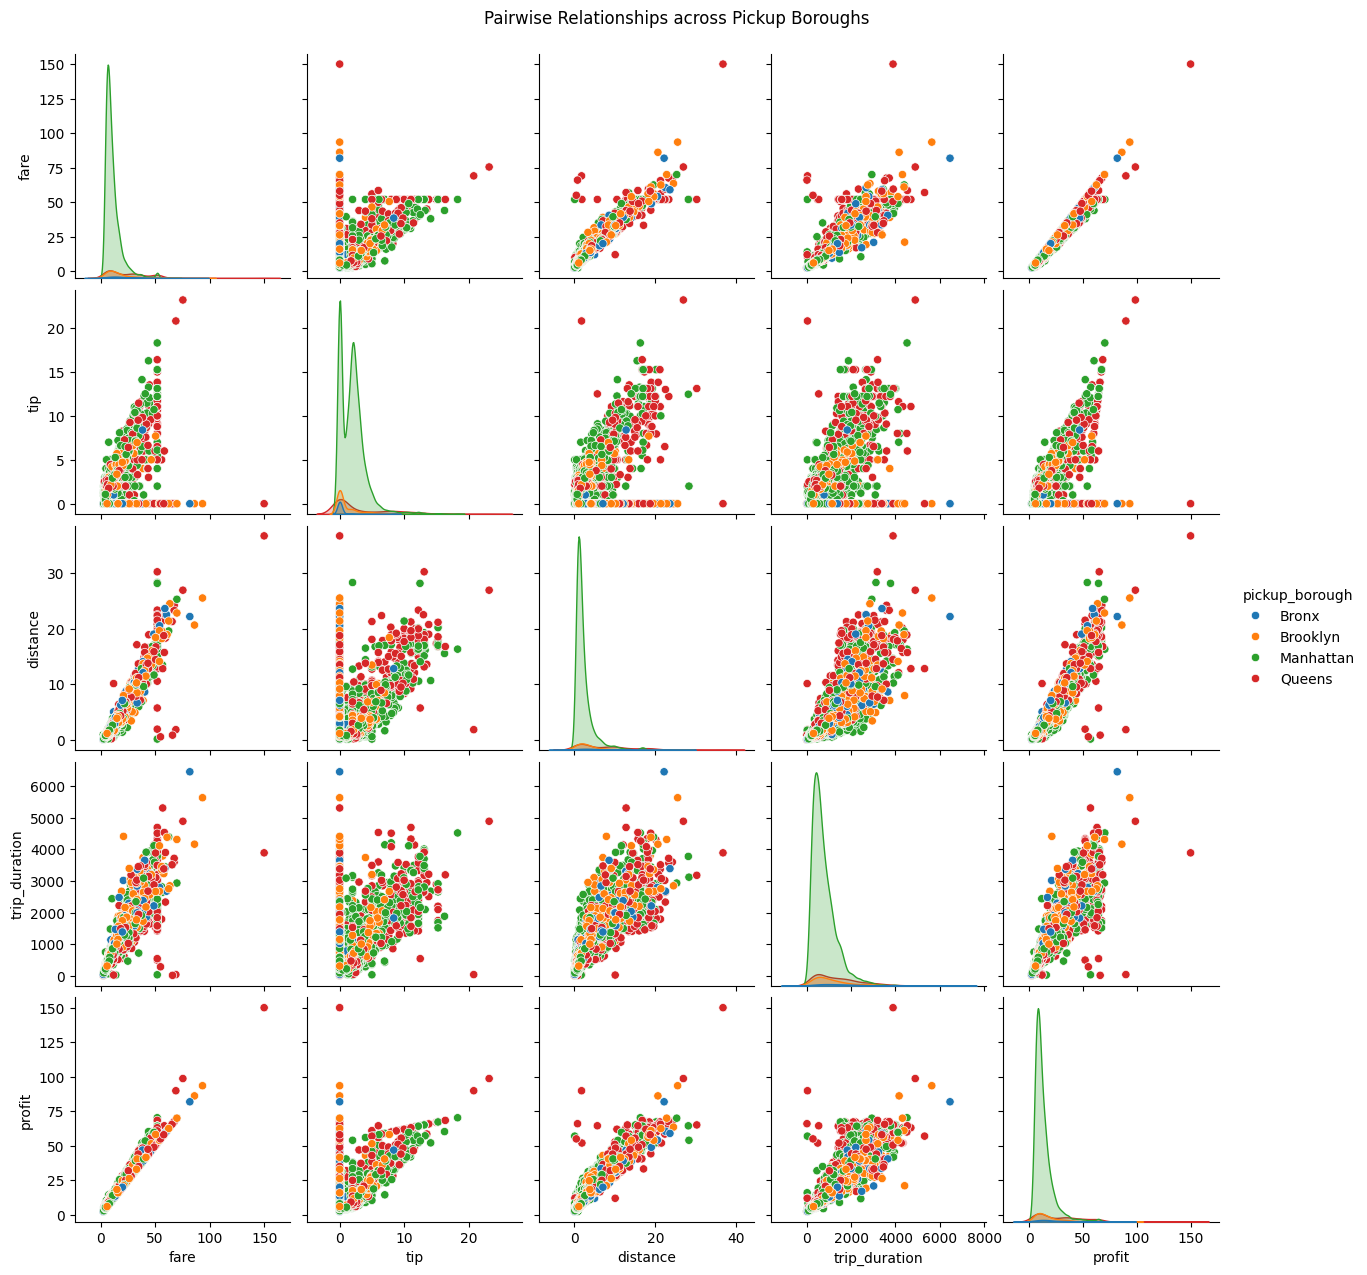

In [29]:
# airplot to explore relationships 
sns.pairplot(df_subset, hue='pickup_borough', vars=['fare', 'tip', 'distance', 'trip_duration', 'profit'])
plt.suptitle("Pairwise Relationships across Pickup Boroughs", y=1.02)
plt.show()

### 3.3 Insights:
- Based on the visualizations and descriptive statistics, write down 3 insights about the dataset.

1. **Profitability by Borough:**

   When looking at the scatter plot of distance vs. profit by pickup borough, we can see that distance and profit are positively correlated. This means that the longer the distance, the higher the profit. 
   
2. **Service level**
   
   *(n%)* = *tip* / *fare (avg)*

   Tips can be a good indicator of sevice level. On average tips are around: Bronx: $0.15 (0.73%), Brooklyn: $0.99 (5.99%), Manhatten: $1.93 (17.41%) and Queens: $3.07 (12.51% tip).

   Its safe to say if you want high tips as a taxi driver Manhatten is a good place, due to the procenatge of fare being highest. In addition Bronx has the second highest fare after queens, but low tips, which may indicate that the service level or experience is not as good as in Manhatten.
   
3. **Trip Characteristics by Borough:**

   The scatter plot of distance vs. profit by pickup borough shows that short trips are more common than long trips. This is expected, as most taxi trips are short distance trips. These short trips are in Manhatten, which is not very profitable, because of the traffic where is take longer time to drive short distance, on average it takes 12 (ish) minuttes to go on avg 2.34 miles, which is not very profitable compared to Queens.

   By examining the grouped statistics, we see that average fare, tip, distance, and trip duration vary across boroughs. Here we learn that Queens is more desirable for taxi drivers due to higher guarantee of profit ($27.62) when picking up passageres in Queens (followed by Bronx: $20.69) this mainly beacuse of high fare, tip and distance which results in a higher profit margin.

   So for maximizing profit, taxi drivers should focus on Queens as they have the highest average profit margins.